# Clustering Crypto

In [1]:
!pip install -U altair

Requirement already up-to-date: altair in /home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages (3.2.0)
Requirement not upgraded as not directly required: six in /home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages (from altair) (1.11.0)
Requirement not upgraded as not directly required: numpy in /home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages (from altair) (1.14.3)
Requirement not upgraded as not directly required: jsonschema in /home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages (from altair) (2.6.0)
Requirement not upgraded as not directly required: toolz in /home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages (from altair) (0.9.0)
Requirement not upgraded as not directly required: entrypoints in /home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages (from altair) (0.2.3)
Requirement not upgraded as not directly required: jinja2 in /home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages (from 

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import altair as alt

### Fetching Cryptocurrency Data

In [3]:
url = "https://min-api.cryptocompare.com/data/all/coinlist"

In [4]:
r = requests.get(url)
data = r.json()

In [5]:
# Creating a DataFrame

In [6]:
list(data.keys())

['Response',
 'Message',
 'Data',
 'BaseImageUrl',
 'BaseLinkUrl',
 'RateLimit',
 'HasWarning',
 'Type']

In [7]:
data = data['Data']

In [8]:
crypto_df = pd.DataFrame.from_dict(data)

In [9]:
crypto_df

,42,300,365,404,433,611,808,888,1337,2015,...,SINX,AION,HAZ,AIPE,TREEC,MISS,DKKT,BTY,CSAC,TEM
Algorithm,Scrypt,N/A,X11,Scrypt,N/A,SHA-256,SHA-256,N/A,X13,X11,...,N/A,"Equihash210,9",N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
BlockNumber,147668,0,NaN,252650,8958563,NaN,0,0,2292252,NaN,...,0,4586765,NaN,0,NaN,0,NaN,NaN,0,NaN
BlockReward,0,0,NaN,0,2,NaN,0,0,450.51,NaN,...,0,1.51379,NaN,0,NaN,0,NaN,NaN,0,NaN
BlockTime,0,0,NaN,60,0,NaN,0,88,60,NaN,...,0,10,NaN,0,NaN,0,NaN,NaN,0,NaN
BuiltOn,N/A,7605,N/A,N/A,7605,N/A,N/A,N/A,N/A,N/A,...,7605,N/A,7605,7605,N/A,7605,N/A,N/A,7605,N/A
CoinName,42 Coin,300 token,365Coin,404Coin,433 Token,SixEleven,808,Octocoin,EliteCoin,2015 coin,...,SINX Token,Aion,Hazza,AI Prediction Ecosystem,TreeCoin,MISS,DKK Token,Bityuan,Credit Safe Application Chain,Temtum
ContentCreatedOn,1427211129,1517935016,1480032918,1466100361,1541597321,1465914773,1473980395,1475534352,1465838687,1425316878,...,1573749796,1512381434,1573821976,1573825407,1573727558,1574069051,1574070819,1574072930,1574073759,1574074626
FullName,42 Coin (42),300 token (300),365Coin (365),404Coin (404),433 Token (433),SixEleven (611),808 (808),Octocoin (888),EliteCoin (1337),2015 coin (2015),...,SINX Token (SINX),Aion (AION),Hazza (HAZ),AI Prediction Ecosystem (AIPE),TreeCoin (TREEC),MISS (MISS),DKK Token (DKKT),Bityuan (BTY),Credit Safe Application Chain (CSAC),Temtum (TEM)
FullyPremined,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Id,4321,749869,33639,21227,926547,20909,28223,29462,20824,3744,...,932568,431235,932571,932573,932558,932576,932578,932580,932582,932584


### Data Preprocessing

In [10]:
# Traspose the data
pd.set_option('display.max_columns', None)
crypto_df_clean = crypto_df.transpose() 
crypto_df_clean.head()

,Algorithm,BlockNumber,BlockReward,BlockTime,BuiltOn,CoinName,ContentCreatedOn,FullName,FullyPremined,Id,ImageUrl,IsTrading,Name,NetHashesPerSecond,PreMinedValue,ProofType,SmartContractAddress,SortOrder,Sponsored,Symbol,Taxonomy,TotalCoinSupply,TotalCoinsFreeFloat,TotalCoinsMined,Url
42,Scrypt,147668,0,0,N/A,42 Coin,1427211129,42 Coin (42),0,4321,/media/35650717/42.jpg,True,42,0,N/A,PoW/PoS,N/A,34,False,42,"{'Access': '', 'FCA': '', 'FINMA': '', 'Indust...",42,N/A,42,/coins/42/overview
300,N/A,0,0,0,7605,300 token,1517935016,300 token (300),0,749869,/media/27010595/300.png,True,300,0,N/A,N/A,0xaec98a708810414878c3bcdf46aad31ded4a4557,2212,False,300,"{'Access': '', 'FCA': '', 'FINMA': '', 'Indust...",300,N/A,300,/coins/300/overview
365,X11,NaN,NaN,NaN,N/A,365Coin,1480032918,365Coin (365),0,33639,/media/352070/365.png,True,365,NaN,N/A,PoW/PoS,N/A,916,False,365,"{'Access': '', 'FCA': '', 'FINMA': '', 'Indust...",2300000000,N/A,NaN,/coins/365/overview
404,Scrypt,252650,0,60,N/A,404Coin,1466100361,404Coin (404),0,21227,/media/35650851/404-300x300.jpg,True,404,0,N/A,PoW/PoS,N/A,602,False,404,"{'Access': '', 'FCA': '', 'FINMA': '', 'Indust...",532000000,N/A,0,/coins/404/overview
433,N/A,8958563,2,0,7605,433 Token,1541597321,433 Token (433),0,926547,/media/34836095/433.png,False,433,183023802068176,N/A,N/A,0x738505a5f31bf72e0b70298bca81150eb1b7c751,3505,False,433,"{'Access': '', 'FCA': '', 'FINMA': '', 'Indust...",1000000000,N/A,1.08604e+08,/coins/433/overview


In [11]:
crypto_df_clean.columns.tolist()

['Algorithm',
 'BlockNumber',
 'BlockReward',
 'BlockTime',
 'BuiltOn',
 'CoinName',
 'ContentCreatedOn',
 'FullName',
 'FullyPremined',
 'Id',
 'ImageUrl',
 'IsTrading',
 'Name',
 'NetHashesPerSecond',
 'PreMinedValue',
 'ProofType',
 'SmartContractAddress',
 'SortOrder',
 'Sponsored',
 'Symbol',
 'Taxonomy',
 'TotalCoinSupply',
 'TotalCoinsFreeFloat',
 'TotalCoinsMined',
 'Url']

In [12]:
# Remove unnecessary columns
crypto_df_clean = crypto_df_clean.drop(['Id', 'Url', 'ImageUrl', 'ContentCreatedOn', 'Name', 'Symbol', 'FullName','FullyPremined', 'BuiltOn', 'SmartContractAddress', 'PreMinedValue', 'TotalCoinsFreeFloat', 'SortOrder', 'Sponsored','Taxonomy', 'BlockNumber', 'NetHashesPerSecond', 'BlockReward', 'BlockTime'], axis=1)

In [13]:
# Keep only cryptocurrencies that are on trading
crypto_df_clean = crypto_df_clean.loc[crypto_df_clean['IsTrading'] == True]

In [14]:
# Keep only cryptocurrencies with a working algorithm
crypto_df_clean = crypto_df_clean.loc[crypto_df_clean['Algorithm'] != 'N/A']

In [15]:
# Remove the "IsTrading" column
crypto_df_clean = crypto_df_clean.drop('IsTrading', axis=1)

In [16]:
# Removing rows with at least 1 null value
for column in crypto_df_clean.columns:
    print(f"Column {column} has {crypto_df_clean[column].isnull().sum()} null values")

Column Algorithm has 0 null values
Column CoinName has 0 null values
Column ProofType has 0 null values
Column TotalCoinSupply has 0 null values
Column TotalCoinsMined has 563 null values


In [17]:
crypto_df_clean = crypto_df_clean.dropna()

In [18]:
for column in crypto_df_clean.columns:
    print(f"Column {column} has {crypto_df_clean[column].isnull().sum()} null values")

Column Algorithm has 0 null values
Column CoinName has 0 null values
Column ProofType has 0 null values
Column TotalCoinSupply has 0 null values
Column TotalCoinsMined has 0 null values


In [19]:
# Removing rows with cryptocurrencies without coins mined
print(f" TotalCoinsMined has {(crypto_df_clean['TotalCoinsMined'] < 1).sum()} with zero coins mined")

 TotalCoinsMined has 185 with zero coins mined


In [20]:
crypto_df_clean = crypto_df_clean.loc[(crypto_df_clean['TotalCoinsMined'] > 1) & (crypto_df_clean['TotalCoinsMined'] != 'NaN')]

In [21]:
print(f" TotalCoinsMined has {(crypto_df_clean['TotalCoinsMined'] < 1).sum()} with zero coins mined")

 TotalCoinsMined has 0 with zero coins mined


In [22]:
crypto_df_clean

,Algorithm,CoinName,ProofType,TotalCoinSupply,TotalCoinsMined
42,Scrypt,42 Coin,PoW/PoS,42,42
1337,X13,EliteCoin,PoW/PoS,314159265359,2.93246e+10
LTC,Scrypt,Litecoin,PoW,84000000,6.36662e+07
XMR,CryptoNight-V7,Monero,PoW,0,1.73139e+07
NXT,PoS,Nxt,PoS/LPoS,1000000000,1000000000
ETC,Ethash,Ethereum Classic,PoW,210000000,115187643
DOGE,Scrypt,Dogecoin,PoW,N/A,1.22105e+11
ZEC,Equihash,ZCash,PoW,21000000,7.87988e+06
BTS,SHA-512,Bitshares,PoS,3600570502,2748130000
DGB,Multiple,DigiByte,PoW,21000000000,1.25049e+10


In [23]:
# Dropping rows where there are 'N/A' text values
for column in crypto_df_clean.columns:
    print(f"Column {column} has {(crypto_df_clean[column]=='N/A').sum()} N/A values")

Column Algorithm has 0 N/A values
Column CoinName has 0 N/A values
Column ProofType has 30 N/A values
Column TotalCoinSupply has 94 N/A values
Column TotalCoinsMined has 0 N/A values


In [24]:
crypto_df_clean = crypto_df_clean[(crypto_df_clean != 'N/A').all(axis=1)]

In [25]:
for column in crypto_df_clean.columns:
    print(f"Column {column} has {(crypto_df_clean[column]=='N/A').sum()} N/A values")

Column Algorithm has 0 N/A values
Column CoinName has 0 N/A values
Column ProofType has 0 N/A values
Column TotalCoinSupply has 0 N/A values
Column TotalCoinsMined has 0 N/A values


In [26]:
# Fetching the cryptocurrencies names prior to drop them from crypto_df
coin_name = crypto_df_clean['CoinName']

In [27]:
# Removig the cryptocurrency name since it's not going to be used on the clustering algorithm
crypto_df_clean = crypto_df_clean.drop('CoinName', axis=1)

In [28]:
# Creating dummies variables for text features
crypto_df_dummies = pd.get_dummies(crypto_df_clean, columns=["Algorithm", "ProofType"])

In [29]:
crypto_df_dummies.head()

,TotalCoinSupply,TotalCoinsMined,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,Algorithm_Counterparty,Algorithm_CryptoNight,Algorithm_CryptoNight Heavy,Algorithm_CryptoNight-V7,Algorithm_Cryptonight Haven,Algorithm_Cryptonight-GPU,Algorithm_DPoS,Algorithm_Dagger,Algorithm_Dagger-Hashimoto,Algorithm_ECC 256K1,Algorithm_Equihash,Algorithm_Equihash+Scrypt,"Algorithm_Equihash210,9",Algorithm_Ethash,Algorithm_Exosis,Algorithm_Green Protocol,Algorithm_Groestl,Algorithm_HEX,Algorithm_HMQ1725,Algorithm_HybridScryptHash256,Algorithm_IMesh,Algorithm_Jump Consistent Hash,Algorithm_Keccak,Algorithm_Leased POS,Algorithm_Lyra2RE,Algorithm_Lyra2REv2,Algorithm_Lyra2Z,Algorithm_M7 POW,Algorithm_Multiple,Algorithm_NIST5,Algorithm_NeoScrypt,Algorithm_Ouroboros,Algorithm_PHI1612,Algorithm_POS 2.0,Algorithm_POS 3.0,Algorithm_PoS,Algorithm_Proof-of-Authority,Algorithm_Proof-of-BibleHash,Algorithm_QUAIT,Algorithm_QuBit,Algorithm_Quark,Algorithm_SHA-256,Algorithm_SHA-256 + Hive,Algorithm_SHA-256D,Algorithm_SHA-512,Algorithm_SHA3,Algorithm_Scrypt,Algorithm_Semux BFT consensus,Algorithm_Shabal256,Algorithm_Skein,Algorithm_SkunkHash,Algorithm_SkunkHash v2 Raptor,Algorithm_Stanford Folding,Algorithm_TRC10,Algorithm_Time Travel,Algorithm_Tribus,Algorithm_VBFT,Algorithm_VeChainThor Authority,Algorithm_X11,Algorithm_X11GOST,Algorithm_X13,Algorithm_X14,Algorithm_X15,Algorithm_X16R,Algorithm_XEVAN,ProofType_DPOS,ProofType_DPoS,ProofType_HPoW,ProofType_LPoS,ProofType_POBh,ProofType_PoA,ProofType_PoC,ProofType_PoS,ProofType_PoS/LPoS,ProofType_PoS/PoW,ProofType_PoS/PoW/PoT,ProofType_PoST,ProofType_PoW,ProofType_PoW + Hive,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,42,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1337,314159265359,2.93246e+10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
LTC,84000000,6.36662e+07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
XMR,0,1.73139e+07,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
NXT,1000000000,1000000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
# Standardizing data
crypto_scaled = StandardScaler().fit_transform(crypto_df_dummies)
print(crypto_scaled[0:5])

[[-0.14903506 -0.11554398 -0.04356068 -0.04356068 -0.04356068 -0.06166264
  -0.07559289 -0.04356068 -0.06166264 -0.06166264 -0.04356068 -0.04356068
  -0.1932048  -0.04356068 -0.09777643 -0.04356068 -0.04356068 -0.11591247
  -0.07559289 -0.04356068 -0.04356068 -0.15249857 -0.04356068 -0.04356068
  -0.13168538 -0.04356068 -0.04356068 -0.08737041 -0.04356068 -0.04356068
  -0.04356068 -0.04356068 -0.04356068 -0.04356068 -0.04356068 -0.07559289
  -0.08737041 -0.08737041 -0.04356068 -0.1389425  -0.1389425  -0.1389425
  -0.04356068 -0.04356068 -0.04356068 -0.07559289 -0.18786729 -0.04356068
  -0.04356068 -0.04356068 -0.07559289 -0.15887957 -0.31259094 -0.04356068
  -0.08737041 -0.07559289 -0.06166264  1.39632398 -0.04356068 -0.04356068
  -0.06166264 -0.04356068 -0.04356068 -0.04356068 -0.04356068 -0.04356068
  -0.04356068 -0.04356068 -0.04356068 -0.40054907 -0.04356068 -0.1767767
  -0.04356068 -0.08737041 -0.08737041 -0.10721125 -0.04356068 -0.13168538
  -0.04356068 -0.04356068 -0.04356068 -0

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### Reducing Dimensions Using PCA

In [31]:
# Using PCA to reduce dimension to 3 principal components
pca = PCA(n_components=3)
crypto_pca = pca.fit_transform(crypto_scaled)

In [32]:
# Creating a DataFrame with the principal components data
df_crypto_pca = pd.DataFrame(
    data=crypto_pca, columns=["principal component 1", "principal component 2", "principal component 3"], index = crypto_df_clean.index
)
df_crypto_pca.head()


,principal component 1,principal component 2,principal component 3
42,-0.318758,1.097371,-0.404028
1337,2.357797,1.659009,-0.538278
LTC,-0.187774,-1.114066,0.049193
XMR,-0.168769,-2.212998,0.285463
NXT,-0.284471,1.406070,-0.261765


### Clustering Crytocurrencies Using K-Means

#### Finding the Best Value for `k` Using the Elbow Curve

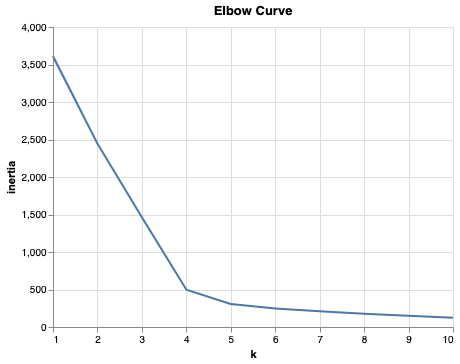

In [33]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range ok k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_crypto_pca)
    inertia.append(km.inertia_)
    
# Create the Elbow Curve using Altair
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
alt.Chart(df_elbow, title="Elbow Curve").mark_line(size=2).encode(x="k", y="inertia")

Running K-Means with k=4

In [34]:
# Initialize the K-Means model
model = KMeans(n_clusters=4, random_state=0)

# Fit the model
model.fit(df_crypto_pca)

# Predict clusters
predictions = model.predict(df_crypto_pca)

# Creating a new DataFrame including predicted clusters and cryptocurrencies features
df_crypto_pca["class"] = model.labels_

df_merged = crypto_df_clean.join(coin_name, how='outer')
df_merged = df_merged.join(df_crypto_pca, how='inner')
df_merged =df_merged.astype({'TotalCoinsMined': 'float64'})
df_merged = df_merged.astype({'TotalCoinSupply': 'float64'})
df_merged.dtypes

Algorithm                 object
ProofType                 object
TotalCoinSupply          float64
TotalCoinsMined          float64
CoinName                  object
principal component 1    float64
principal component 2    float64
principal component 3    float64
class                      int32
dtype: object

In [35]:
df_merged.head(5)

,Algorithm,ProofType,TotalCoinSupply,TotalCoinsMined,CoinName,principal component 1,principal component 2,principal component 3,class
42,Scrypt,PoW/PoS,4.200000e+01,4.199995e+01,42 Coin,-0.318758,1.097371,-0.404028,0
1337,X13,PoW/PoS,3.141593e+11,2.932458e+10,EliteCoin,2.357797,1.659009,-0.538278,0
LTC,Scrypt,PoW,8.400000e+07,6.366623e+07,Litecoin,-0.187774,-1.114066,0.049193,1
XMR,CryptoNight-V7,PoW,0.000000e+00,1.731393e+07,Monero,-0.168769,-2.212998,0.285463,1
NXT,PoS,PoS/LPoS,1.000000e+09,1.000000e+09,Nxt,-0.284471,1.406070,-0.261765,0


### Visualizing Results

#### Scatter with Clusters

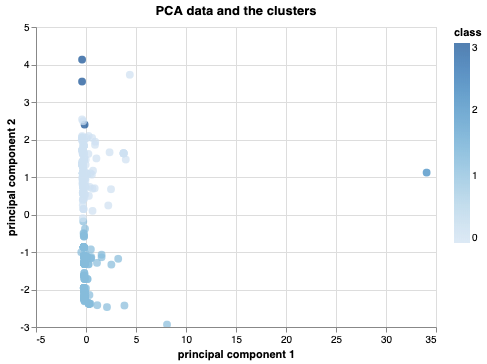

In [36]:
# Creating a Scatter plot with the PCA data and the clusters

alt.Chart(df_merged, title= "PCA data and the clusters").mark_circle(size=60).encode(
    x='principal component 1',
    y='principal component 2',
    color='class',
    tooltip=["CoinName", "Algorithm", "TotalCoinsMined", "TotalCoinSupply"]
).interactive()

#### Scatter Plot with Tradable Cryptocurrencies

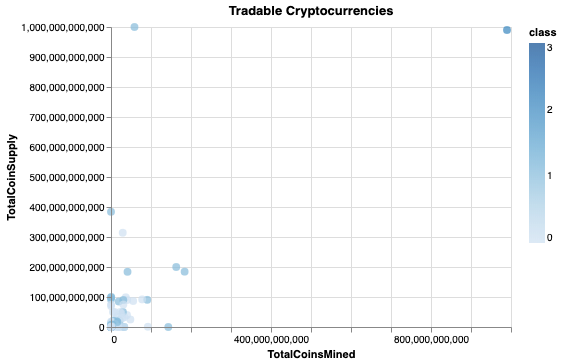

In [37]:
# Plot the scatter with x="TotalCoinsMined" and y="TotalCoinSupply"
alt.Chart(df_merged, title="Tradable Cryptocurrencies").mark_circle(size=60).encode(
    x="TotalCoinsMined",
    y="TotalCoinSupply",
    color='class',
    tooltip=["CoinName", "Algorithm", "TotalCoinsMined", "TotalCoinSupply"]
)

#### Table of Tradable Cryptocurrencies

In [38]:
# Table with tradable cryptos
pd.set_option('display.max_rows', None)
display(df_merged)

,Algorithm,ProofType,TotalCoinSupply,TotalCoinsMined,CoinName,principal component 1,principal component 2,principal component 3,class
42,Scrypt,PoW/PoS,4.200000e+01,4.199995e+01,42 Coin,-0.318758,1.097371,-0.404028,0
1337,X13,PoW/PoS,3.141593e+11,2.932458e+10,EliteCoin,2.357797,1.659009,-0.538278,0
LTC,Scrypt,PoW,8.400000e+07,6.366623e+07,Litecoin,-0.187774,-1.114066,0.049193,1
XMR,CryptoNight-V7,PoW,0.000000e+00,1.731393e+07,Monero,-0.168769,-2.212998,0.285463,1
NXT,PoS,PoS/LPoS,1.000000e+09,1.000000e+09,Nxt,-0.284471,1.406070,-0.261765,0
ETC,Ethash,PoW,2.100000e+08,1.151876e+08,Ethereum Classic,-0.172609,-2.044662,0.157377,1
ZEC,Equihash,PoW,2.100000e+07,7.879881e+06,ZCash,-0.219495,-1.959470,0.241835,1
BTS,SHA-512,PoS,3.600571e+09,2.748130e+09,Bitshares,-0.289945,1.748664,0.083185,0
DGB,Multiple,PoW,2.100000e+10,1.250493e+10,DigiByte,0.143519,-1.724011,0.200261,1
BTCD,SHA-256,PoW/PoS,2.200000e+07,1.288862e+06,BitcoinDark,-0.280246,0.890339,-0.272207,0
